In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=27_to_t=30_grid_64_c=1by64_decor_t_16min.npz')
data2 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=30_to_t=33_grid_64_c=1by64_decor_t_16min.npz')
data3 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=33_to_t=36_grid_64_c=1by64_decor_t_16min.npz')
data4 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=36_to_t=39_grid_64_c=1by64_decor_t_16min.npz')
data5 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=39_to_t=42_grid_64_c=1by64_decor_t_16min.npz')
data6 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=42_to_t=45_grid_64_c=1by64_decor_t_16min.npz')

In [3]:
data1.files

['dX_x', 'dX_y']

In [4]:
dX1 = np.concatenate((data1['dX_x'], data2['dX_x'], data3['dX_x'], data4['dX_x'], data5['dX_x'], data6['dX_x']), axis=0)
dX2 = np.concatenate((data1['dX_y'], data2['dX_y'], data3['dX_y'], data4['dX_y'], data5['dX_y'], data6['dX_y']), axis=0)

In [5]:
dX1.shape, dX2.shape

((901, 29120), (901, 29120))

In [6]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(901, 58240)

In [7]:
m = dX.shape[0]
print(m)

901


In [8]:
from numpy import linalg as LA
from scipy import signal

In [9]:
Dt_c = 0.02
scaled_dX = dX/np.sqrt(Dt_c)

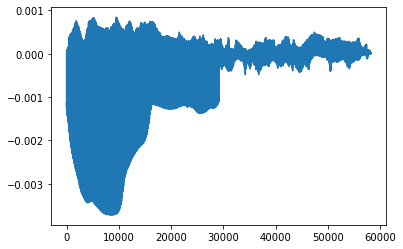

In [10]:
xi_0 = np.mean(scaled_dX, axis=0)
plt.plot(xi_0)

In [11]:
xi_0 = np.reshape(xi_0, (1, -1))
xi_0.shape

(1, 58240)

In [12]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(901, 58240)

In [13]:
A, b, CT = LA.svd(F, full_matrices=False)

In [14]:
print(b) # variances of the EOFs 

[1.25599079e+00 1.18680378e+00 1.09041287e+00 1.03660332e+00
 9.92189440e-01 9.13730363e-01 8.98292670e-01 8.53295134e-01
 7.90261689e-01 7.85021222e-01 7.35507690e-01 7.21488522e-01
 7.14371137e-01 6.97647555e-01 6.79580556e-01 6.72959444e-01
 6.51610343e-01 6.39943755e-01 6.11336416e-01 6.00517558e-01
 5.98944125e-01 5.76304191e-01 5.58282381e-01 5.50140671e-01
 5.41532334e-01 5.38299046e-01 5.34986800e-01 5.23372179e-01
 5.15358329e-01 5.02425566e-01 4.96440573e-01 4.87445561e-01
 4.67792533e-01 4.61015857e-01 4.59577356e-01 4.51178919e-01
 4.48090471e-01 4.41873490e-01 4.34713032e-01 4.27920867e-01
 4.27448775e-01 4.20479105e-01 4.03378128e-01 4.00614664e-01
 3.98130177e-01 3.86998354e-01 3.79337174e-01 3.74612516e-01
 3.68868769e-01 3.66396227e-01 3.62650584e-01 3.60045791e-01
 3.58162996e-01 3.52764735e-01 3.50073158e-01 3.46173361e-01
 3.36144643e-01 3.30203966e-01 3.24392992e-01 3.22621359e-01
 3.20956807e-01 3.15745306e-01 3.14136395e-01 3.11589784e-01
 3.08340939e-01 3.029227

In [15]:
B = np.diag(b) # matrix containing variances

In [16]:
A.shape, B.shape, CT.shape

((901, 901), (901, 901), (901, 58240))

In [17]:
t_mat = np.matmul(A,B) # matrix containig time-series info
t_mat.shape

(901, 901)

In [18]:
xi_mat = CT # this matrix contain the EOFs

94 EOFs contain 90 percent of the total variance. Therefore we only extract this info from SVD of F

In [19]:
n_EOFs = 94

In [20]:
D = np.matmul(t_mat[:,:n_EOFs], xi_mat[:n_EOFs,:]) # info corresponding to 51 EOFs
t_mat[:,:n_EOFs].shape, xi_mat[:n_EOFs,:].shape, D.shape

((901, 94), (94, 58240), (901, 58240))

In [21]:
E = xi_0 + D # this should be approximately equal to matrix scaled_dX
# E = D #  not including the mean has very small effect on the final matrix
E.shape

(901, 58240)

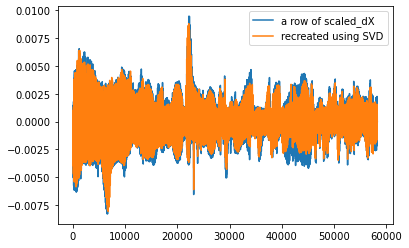

In [22]:
# rand_ele = int(np.random.uniform(0, 200))
rand_ele = 0
plt.plot(scaled_dX[rand_ele, :], label='a row of scaled_dX')
plt.plot(E[rand_ele,:], label='recreated using SVD')
plt.legend()

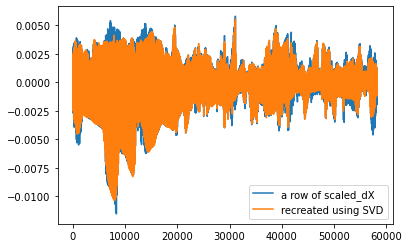

In [23]:
rand_ele = 200
plt.plot(scaled_dX[rand_ele, :], label='a row of scaled_dX')
plt.plot(E[rand_ele,:], label='recreated using SVD')
plt.legend()

In [24]:
combined_vec = E
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((901, 58240), (901, 29120, 2))

In [25]:
stoch_f_mat = detached_vec
stoch_f_mat.shape

(901, 29120, 2)

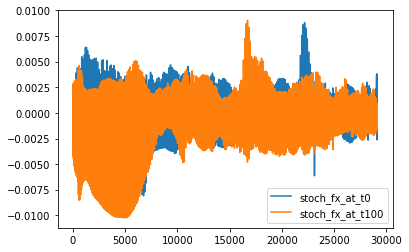

In [27]:
plt.plot(stoch_f_mat[0,:,0], label='stoch_fx_at_t0')
plt.plot(stoch_f_mat[100,:,0], label='stoch_fx_at_t100')
plt.legend()

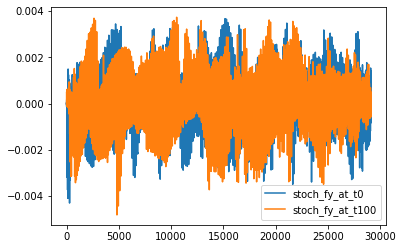

In [28]:
plt.plot(stoch_f_mat[0,:,1], label='stoch_fy_at_t0')
plt.plot(stoch_f_mat[100,:,1], label='stoch_fy_at_t100')
plt.legend()

In [29]:
data_file = './forcing/stochastic_forcing_as_deterministic_t27_to_t45_mesh64_var90.npz'

np.savez(data_file, stoch_f_mat = stoch_f_mat)